In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, exp
import random

In [2]:
# Loading Data
data = pd.read_csv('../data/TSP.csv')
data.head(10)

,index,x,y
0,1,565,575
1,2,25,185
2,3,345,750
3,4,945,685
4,5,845,655
5,6,880,660
6,7,25,230
7,8,525,1000
8,9,580,1175
9,10,650,1130


In [3]:
I = data['index'].tolist()
X = data['x'].tolist()
Y = data['y'].tolist()

In [4]:
# Creating tuples
I_array = np.array(I).reshape(52, 1)
X_array = np.array(X).reshape(52, 1)
Y_array = np.array(Y).reshape(52, 1)

In [5]:
points = np.hstack((I_array, X_array, Y_array))
points.shape

(52, 3)

In [6]:
# Task 1 (Random path)
np.random.shuffle(points)

In [7]:
def show_top(points):
    for i in range(10):
        print(points[i])

In [14]:
show_top(points)

[ 25 975 580]
[ 41 475 960]
[ 23 480 415]
[  2  25 185]
[ 31 420 555]
[  14 1530    5]
[ 19 510 875]
[ 48 830 610]
[  47 1170   65]
[ 20 560 365]


In [79]:
print(np.amin(X_array))
print(np.amax(X_array))

25
1740


In [80]:
print(np.amin(Y_array))
print(np.amax(Y_array))

5
1175


In [8]:
def plot_path(points):
    max_length = len(points)
    for i in range(max_length):
        i1, x1, y1 = points[i]
        plt.plot(x1, y1, "o", color='r')
        plt.text(x1, y1, i1)
        if (i + 1) < max_length:
            i2, x2, y2 = points[i + 1]
            plt.plot([x1, x2], [y1, y2], linestyle='-', color='b', linewidth=1)
    plt.axis([-50, 2000, -50, 1300])
    plt.show()    

In [9]:
def get_distance(points, metrics):
    dist = 0
    max_length = len(points)
    for i in range(max_length):
        i1, x1, y1 = points[i]
        if (i + 1) < max_length:
            i2, x2, y2 = points[i + 1]
            dist += metrics(x1, x2, y1, y2)
    return dist

In [10]:
manhattan = lambda x1, x2, y1, y2: abs(x1 - x2) + abs(y1 - y2)
euclid = lambda x1, x2, y1, y2: sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

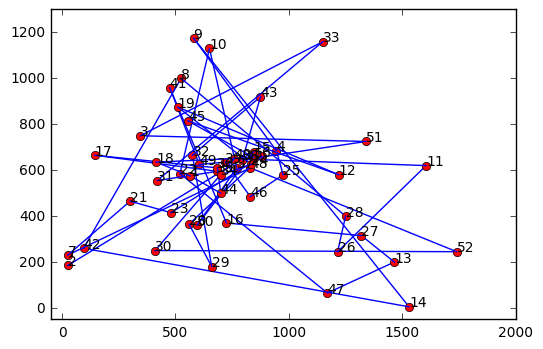

In [84]:
plot_path(points)
        

In [85]:
print("Distance =", get_distance(points, manhattan))

Distance = 35310


In [11]:
# Task 2 (Hill climbing method)
np.random.shuffle(points)
show_top(points)    

[ 20 560 365]
[  26 1215  245]
[ 40 760 650]
[ 30 410 250]
[ 36 685 610]
[ 23 480 415]
[ 31 420 555]
[  7  25 230]
[  47 1170   65]
[   9  580 1175]


In [12]:
def get_next_hill(points, index):
    result = np.array([])
    length = len(points)
    score = get_distance(points, manhattan)
    test_value = points[index]
    for i in range(1, length):
        variant = np.array(points)
        variant[index] = variant[i]
        variant[i] = test_value
        new_score = get_distance(variant, manhattan)
        if new_score < score:
            result = variant
            score = new_score
    return result

In [88]:
print("Start distance =", get_distance(points, manhattan))

Start distance = 37330


In [89]:
for i in range (1, len(points)):
    result = get_next_hill(points, i)
    if result.size != 0:
        points = result
        print("Distance:", get_distance(result, manhattan))

Distance: 36060
Distance: 34070
Distance: 33270
Distance: 32260
Distance: 30800
Distance: 30690
Distance: 29210
Distance: 28890
Distance: 28440
Distance: 26510
Distance: 26330
Distance: 25780
Distance: 24790
Distance: 24220
Distance: 23710
Distance: 23230
Distance: 23080
Distance: 22740
Distance: 22640
Distance: 22430
Distance: 22400
Distance: 22300
Distance: 22050
Distance: 21960
Distance: 21070
Distance: 20480
Distance: 20190
Distance: 19680
Distance: 19610
Distance: 19490
Distance: 19310
Distance: 18850
Distance: 18540
Distance: 18400
Distance: 18100
Distance: 17900
Distance: 17680
Distance: 17660
Distance: 17580
Distance: 17310
Distance: 16660
Distance: 16070
Distance: 15950
Distance: 15715


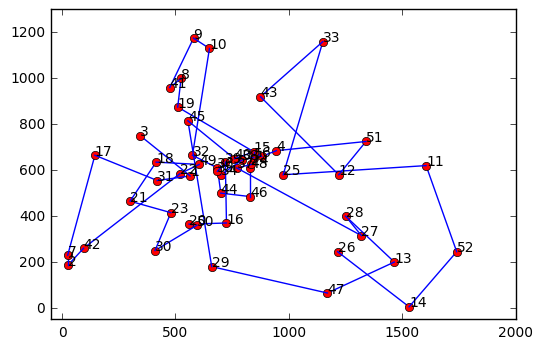

In [90]:
plot_path(points)

In [91]:
print("Distance:", get_distance(points, manhattan))

Distance: 15715


In [92]:
show_top(points) 

[  26 1215  245]
[  14 1530    5]
[  52 1740  245]
[  11 1605  620]
[ 25 975 580]
[  33 1150 1160]
[ 43 875 920]
[  12 1220  580]
[  51 1340  725]
[  4 945 685]


In [159]:
# Task 3 (Simulated Annealing)

In [160]:
points = np.hstack((I_array, X_array, Y_array))
np.random.shuffle(points)
show_top(points)    

[  3 345 750]
[  33 1150 1160]
[ 43 875 920]
[ 32 575 665]
[  14 1530    5]
[ 40 760 650]
[ 38 795 645]
[  1 565 575]
[ 23 480 415]
[ 45 555 815]


In [161]:
anneal_result = np.array(points)
anneal_score = get_distance(points, manhattan)

print("Anneal start dist =", anneal_score)

Anneal start dist = 40255


In [13]:
def probability(prev_score, next_score, temperature):
    if next_score > prev_score:
        return 1.0
    else:
        return exp(-abs(next_score - prev_score) / temperature )

In [14]:
def get_next(points, index):
    result = np.array([])
    length = len(points)
    score = get_distance(points, manhattan)
    test_value = points[index]
    for i in range(1, length):
        variant = np.array(points)
        variant[index] = variant[i]
        variant[i] = test_value
        new_score = get_distance(variant, manhattan)
        if new_score < score:
            result = variant
            score = new_score
            continue
        old_score = get_distance(result, manhattan)
        if result.size == 0 or new_score < old_score:
            result = variant
    return result

In [164]:
def kirkpatrick_cooling(start_temp,alpha):
    T=start_temp
    while True:
        yield T
        T=alpha*T

In [165]:
temperature = np.linspace(20000, 5000, 200)

In [166]:
for temp in temperature:
    temp_answer = points
    length = len(points)
    for i in range(1, length):
        neighbour = get_next(temp_answer, i)
        prev_score = get_distance(temp_answer, manhattan)
        next_score = get_distance(neighbour, manhattan)
        P = probability(prev_score, next_score, temp)
        if random.random() < P:
            temp_answer = neighbour
    temp_score = get_distance(temp_answer, manhattan)
    if (anneal_score > temp_score):
        anneal_score = temp_score
        anneal_result = temp_answer
        print("Temp =", temp)
        print("Dist =", anneal_score)
        

Temp = 20000.0
Dist = 17720
Temp = 19924.6231156
Dist = 17310
Temp = 19773.8693467
Dist = 16145
Temp = 19396.9849246
Dist = 16070
Temp = 18115.5778894
Dist = 16010
Temp = 16608.040201
Dist = 15950
Temp = 12989.9497487
Dist = 15730
Temp = 12160.8040201
Dist = 15360
Temp = 9974.87437186
Dist = 15235
Temp = 9221.10552764
Dist = 14750
Temp = 6658.29145729
Dist = 14580


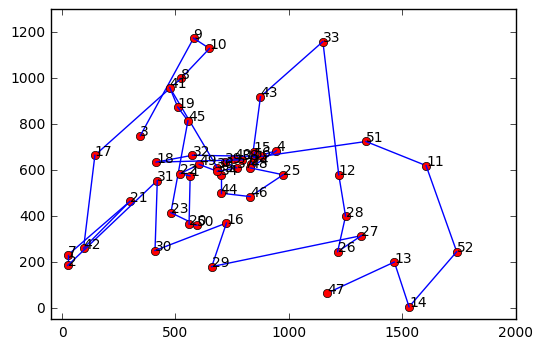

In [167]:
plot_path(anneal_result)

In [117]:
print("Score =", anneal_score)

Score = 14415


In [360]:
# Task 4 (GA)

In [15]:
points = np.hstack((I_array, X_array, Y_array))
np.random.shuffle(points)
show_top(points)  

[ 24 835 625]
[ 50 595 360]
[ 17 145 665]
[   8  525 1000]
[ 32 575 665]
[ 19 510 875]
[  47 1170   65]
[ 46 830 485]
[  27 1320  315]
[ 31 420 555]


In [16]:
population_size = 100

In [17]:
def generate():
    population = []
    for i in range(100):
        np.random.shuffle(points)
        population.append(np.array(points))
    return np.array(population)

In [18]:
def get_top(path_array, amount):
    len_array = []
    for i in path_array:
        len_array.append((i,get_distance(i, manhattan)))
    len_array = np.array(len_array)
    len_array = len_array[len_array[:,1].argsort()]
    return np.array(len_array[:amount,0])

In [19]:
top_10 = get_top(generate(), 10)

In [20]:
def find_index(array, element):
    for i in range(len(array)):
        if array[i][0] == element[0]:
            return i

In [21]:
def mutate(a_array, b_array):
    length = len(a_array) // 2
    for i in range(length, 2 * length):
        b_array = get_next(b_array, i)
    for i in range(length, 2 * length):
        ind = find_index(a_array, b_array[i])
        a_array[ind] = a_array[i]
        a_array[i] = b_array[i]
    arr = get_next(a_array, 0)
    for i in range(1, length):
        arr = get_next(arr, i)
    return np.array(arr)


In [22]:
def get_mutations(path_array):
    result = []
    for i in range(0, len(path_array) - 1):
        result.append(mutate(path_array[i], path_array[i + 1]))
    return np.array(result)
        

In [23]:
mutations = get_mutations(top_10)
mutated_top5_prev = get_top(mutations, 5)

In [24]:
for item in mutated_top5_prev:
    print(get_distance(item, manhattan))

14525
15535
17050
17160
17225


In [25]:
for i in range(10):
    top_100 = get_top(generate(), 10)
    mutations = get_mutations(top_100)
    mutated_top5_next = get_top(mutations, 5)
    mutated = np.append(mutated_top5_prev, mutated_top5_next)
    mutated = get_mutations(mutated)
    mutated_top5_prev = get_top(mutated, 5)

12345


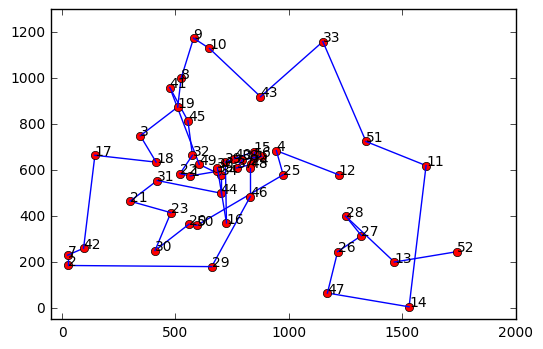

In [26]:
result = get_distance(mutated_top5_prev[0], manhattan)
print(result)
plot_path(mutated_top5_prev[0])